# 미국 ETF 포트폴리오 백테스트

## 대상 ETF 유니버스 만들기

미국 상장 ETF를 기본 대상으로 한다. 그 이유는 유동성이 풍부하고, 다양한 자산을 기초자산으로 하는 ETF가 상장되어 있으며, ETF거래가 시작된지 오래되어 충분한 데이터 수집이 가능하기 때문이다.<br>
이 중에서 수수료(Expense Ratio)가 낮고 AUM(Asset Under Management)이 높으며, 가격 데이터가 많은(2011년 2월부터 수집가능)한 ETF를 선택하여 투자대상 POOL을 만든다.<br>
종목정보 데이터는 etf.com 웹사이트 스크레이핑을 통해서 수집한다.

|ticker	| name |
| ---   | --- |
| DBE	| Invesco DB Energy Fund |
| IAU	| iShares Gold Trust |
| SLV	| iShares Silver Trust |
| AIA	| iShares Asia 50 ETF |
| VPL	| Vanguard FTSE Pacific ETF |
| VGK	| Vanguard FTSE Europe ETF |
| VWO	| Vanguard FTSE Emerging Markets ETF |
| VXUS	| Vanguard Total International Stock ETF |
| RWO	| SPDR Dow Jones Global Real Estate ETF |
| VOO	| Vanguard S&P 500 ETF |
| VO	| Vanguard Mid-Cap ETF |
| VB	| Vanguard Small-Cap ETF |
| SCHH	| Schwab U.S. REIT ETF |
| EMLC	| VanEck J.P. Morgan EM Local Currency Bond ETF |
| AGG	| iShares Core U.S. Aggregate Bond ETF |

## 가격데이터 수집

가격데이터는 이후에 설명할 백테스트 라이브러리인 bt를 사용하여 수집한다. 수집대상 데이터는 수정주가(Adjusted Price)로 한다.

In [2]:
import bt
# bt_data = bt.get("DBE, IAU, SLV, AIA, VPL, VGK, VWO, VXUS, RWO, VOO, VO, VB, SCHH, EMLC, AGG", start = '2011-01-28', end = '2011-02-05')
data = bt.get("DBE, IAU, SLV, AIA, VPL, VGK, VWO, VXUS, RWO, VOO, VO, VB, SCHH, EMLC, AGG", start = '2011-02-01')
data

,dbe,iau,slv,aia,vpl,vgk,vwo,vxus,rwo,voo,vo,vb,schh,emlc,agg
Date,,,,,,,,,,,,,,,
2011-01-31,27.322599,26.020000,27.389999,37.562267,42.022163,34.824390,34.715923,36.029789,25.498055,95.130302,64.746689,62.130360,9.824188,28.791588,79.834129
2011-02-01,27.380569,26.180000,27.870001,38.203346,42.722897,35.604351,35.462669,36.802696,25.762384,96.617447,65.785095,63.370602,9.854278,28.888765,79.664391
2011-02-02,27.699396,26.139999,27.690001,38.203346,43.025314,35.419624,35.186367,36.614883,25.674274,96.455856,65.631866,63.073280,9.842996,28.888765,79.573441
2011-02-03,27.593119,26.459999,28.290001,38.155865,43.372013,35.289619,35.156506,36.679893,25.782721,96.698273,66.014877,63.438553,9.884365,28.778336,79.277870
2011-02-04,27.187338,26.379999,28.400000,38.353722,43.431000,35.221207,35.141563,36.658234,25.626827,96.956932,66.338318,63.667934,9.779054,28.844587,79.012672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,23.080000,36.830002,22.879999,68.629997,74.050003,62.279999,46.130001,59.740002,54.009998,415.170013,237.839996,212.520004,24.889999,26.903000,106.939995
2022-04-01,23.410000,36.540001,22.740000,69.589996,74.570000,63.009998,47.009998,60.389999,55.029999,416.320007,239.199997,214.330002,25.410000,26.969999,106.750000
2022-04-04,23.969999,36.730000,22.629999,71.239998,75.230003,63.049999,47.830002,60.880001,54.549999,419.850006,240.410004,214.669998,25.260000,27.020000,106.839996


## Simple Backtest Example (Equal Weight Portfolio)

In [2]:
import pandas as pd
%matplotlib inline

<AxesSubplot:title={'center':'Equity Progression'}>

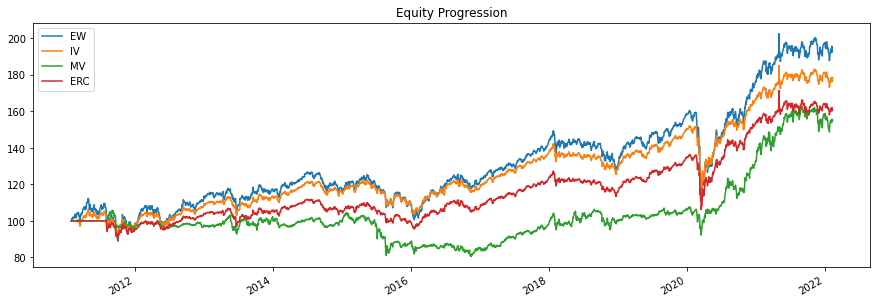

In [10]:
strategy_ew = bt.Strategy("EW", [bt.algos.RunMonthly(), bt.algos.SelectAll(), bt.algos.WeighEqually(), bt.algos.Rebalance()])
strategy_iv = bt.Strategy('IV', [bt.algos.RunMonthly(), bt.algos.SelectAll(), bt.algos.WeighInvVol(),  bt.algos.Rebalance()])
strategy_mv = bt.Strategy('MV', [bt.algos.RunAfterDays(20*6+1),
                                 bt.algos.RunMonthly(), 
                                 bt.algos.SelectAll(), 
                                 bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=20*6)),
                                 bt.algos.Rebalance()])
strategy_erc = bt.Strategy("ERC", [bt.algos.RunAfterDays(20*6+1),
                                   bt.algos.RunMonthly(),
                                   bt.algos.SelectAll(),
                                   bt.algos.WeighERC(lookback=pd.DateOffset(days=20*6)),
                                   bt.algos.Rebalance()])
backtest_ew = bt.Backtest(strategy_ew, data)
backtest_iv = bt.Backtest(strategy_iv, data)
backtest_mv = bt.Backtest(strategy_mv, data)
backtest_erc = bt.Backtest(strategy_erc, data)
result = bt.run(backtest_ew, backtest_iv, backtest_mv, backtest_erc)
result.plot()

<AxesSubplot:title={'center':'Equity Progression'}>

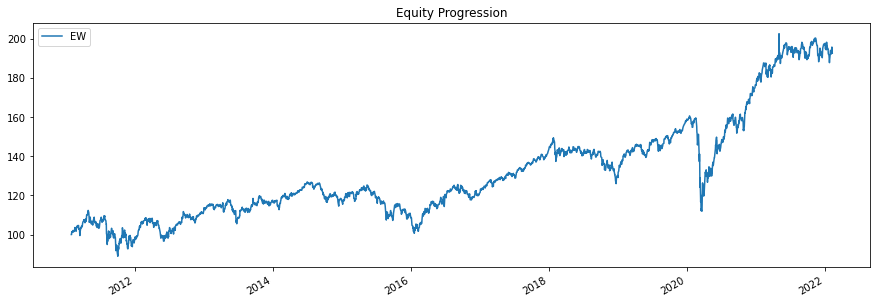

In [4]:
result_ew.plot()

In [11]:
result.display()

Stat                 EW          IV          MV          ERC
-------------------  ----------  ----------  ----------  ----------
Start                2011-01-30  2011-01-30  2011-01-30  2011-01-30
End                  2022-02-11  2022-02-11  2022-02-11  2022-02-11
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         92.62%      76.36%      54.68%      60.38%
Daily Sharpe         0.50        0.55        0.42        0.51
Daily Sortino        0.74        0.82        0.63        0.77
CAGR                 6.12%       5.28%       4.03%       4.37%
Max Drawdown         -30.30%     -24.62%     -23.80%     -22.10%
Calmar Ratio         0.20        0.21        0.17        0.20

MTD                  0.18%       -0.06%      0.53%       -0.10%
3m                   -3.62%      -3.36%      -3.49%      -2.76%
6m                   -0.69%      -1.86%      -2.70%      -1.61%
YTD                  -2.32%      -2.73%      -1.85%      -2.39%
1Y                   3.10%       1.9

Text(0.5, 0.98, 'Return Histogram Matrix')

<Figure size 432x288 with 0 Axes>

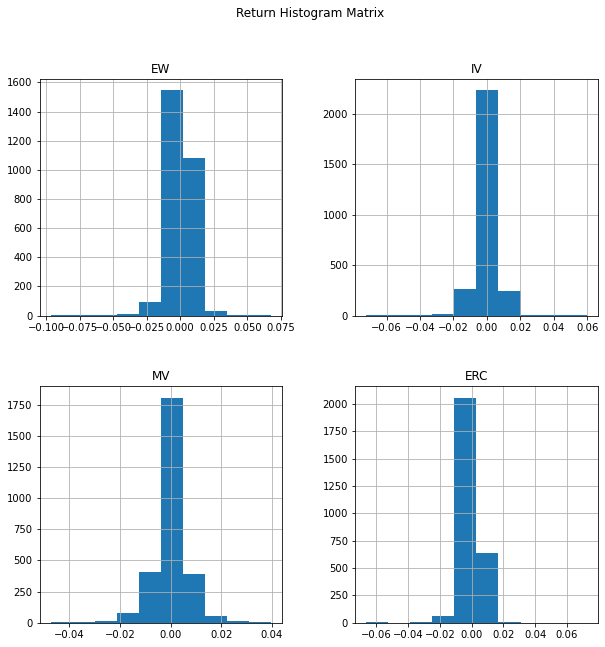

In [20]:
result.plot_histograms()

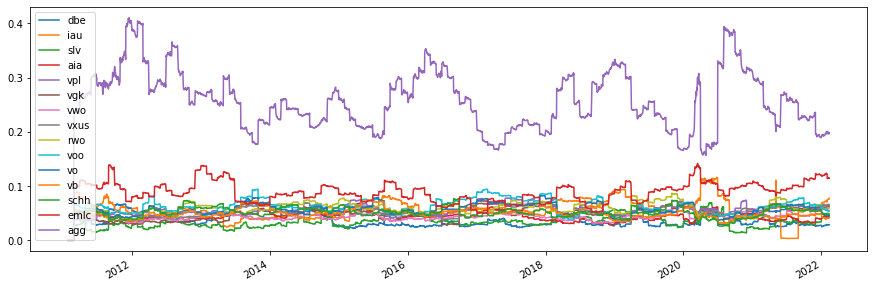

In [23]:
result.plot_security_weights()

<AxesSubplot:title={'center':'Equity Progression'}>

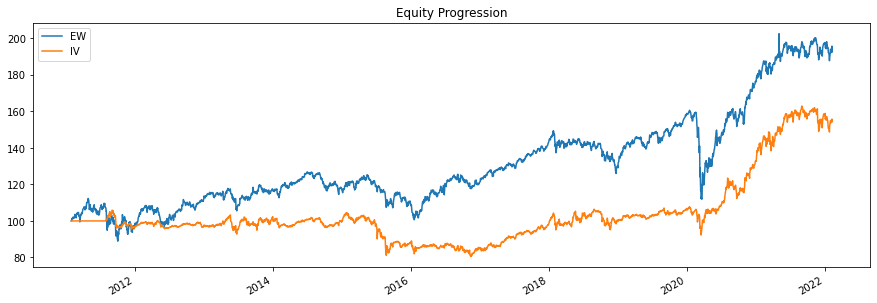

In [9]:
# create our new strategy
strategy_iv = bt.Strategy('IV', [bt.algos.RunAfterDays(20*6+1),
                                 bt.algos.RunMonthly(),
                                 bt.algos.SelectAll(),
                        # bt.algos.WeighInvVol(),
                                 bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=20*6)),
                                 bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
backtest_iv = bt.Backtest(strategy_iv, data)
# we include test here to see the results side-by-side
res2 = bt.run(backtest_ew, backtest_iv)

res2.plot()

In [ ]:
import pandas as pd
# 전체 자산 동일비중, 매월 말 리밸런싱
strategy = bt.Strategy("Asset_ERC",
                       [
                           bt.algos.RunAfterDays(20*6+1),
                           bt.algos.SelectAll(),
                           # bt.algos.WeighEqually(),
                        #    bt.algos.RunMonthly(),
                           bt.algos.WeighERC(lookback=pd.DateOffset(days=20*6)),
                           # bt.algos.RunMonthly(),
                           bt.algos.Rebalance()
                       ])

In [ ]:
# data = prices.dropna()

# 백테스트 생성
backtest = bt.Backtest(strategy, bt_data)

# 백테스트 실행
result = bt.run(backtest)

ValueError: Found array with 0 sample(s) (shape=(0, 15)) while a minimum of 1 is required.

In [ ]:
result.prices

,Asset_ERC
2011-01-27,100.000000
2011-01-28,100.000000
2011-01-31,100.000000
2011-02-01,100.000000
2011-02-02,100.000000
...,...
2022-01-28,158.800917
2022-01-31,160.538309
2022-02-01,160.976176
2022-02-02,161.609644


In [ ]:
result.prices.to_returns()

,Asset_ERC
2011-01-27,NaN
2011-01-28,0.000000
2011-01-31,0.000000
2011-02-01,0.000000
2011-02-02,0.000000
...,...
2022-01-28,0.004694
2022-01-31,0.010941
2022-02-01,0.002727
2022-02-02,0.003935


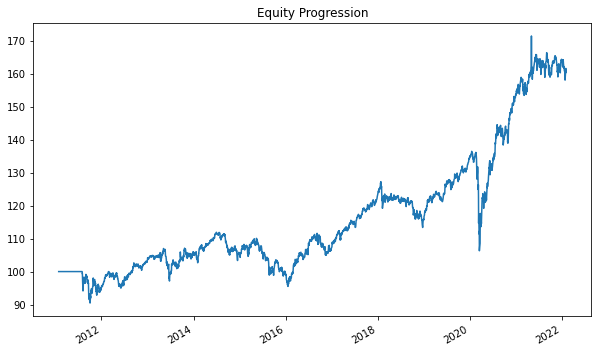

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

result.plot(figsize = (10, 6), legend = False)
plt.show()

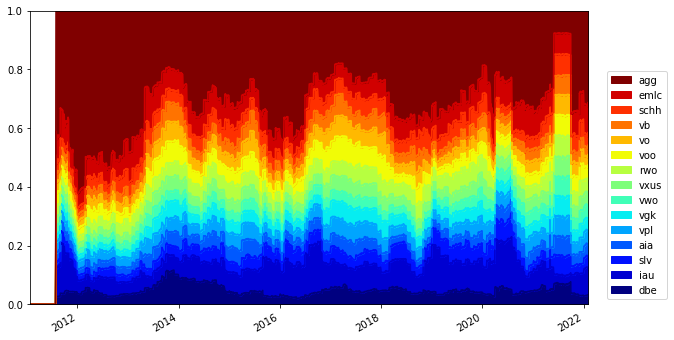

In [ ]:
from matplotlib import cm

wt = result.get_security_weights().reindex(columns = bt_data.columns)
ax = wt.plot.area(figsize = (10, 6), ylim = [0, 1], legend = False, colormap = cm.jet)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles), reversed(labels), loc='lower right', bbox_to_anchor=(1.15, 0))
plt.show()

In [ ]:
bt_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2774 entries, 2011-01-28 to 2022-02-03
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dbe     2774 non-null   float64
 1   iau     2774 non-null   float64
 2   slv     2774 non-null   float64
 3   aia     2774 non-null   float64
 4   vpl     2774 non-null   float64
 5   vgk     2774 non-null   float64
 6   vwo     2774 non-null   float64
 7   vxus    2774 non-null   float64
 8   rwo     2774 non-null   float64
 9   voo     2774 non-null   float64
 10  vo      2774 non-null   float64
 11  vb      2774 non-null   float64
 12  schh    2774 non-null   float64
 13  emlc    2774 non-null   float64
 14  agg     2774 non-null   float64
dtypes: float64(15)
memory usage: 411.3 KB


In [ ]:
bt_data

,dbe,iau,slv,aia,vpl,vgk,vwo,vxus,rwo,voo,vo,vb,schh,emlc,agg
Date,,,,,,,,,,,,,,,
2011-01-28,26.887833,26.080000,27.299999,37.451469,41.844860,34.387383,34.456791,35.692001,25.297449,94.720840,64.447952,61.823658,19.404797,29.078541,80.221916
2011-01-31,27.322599,26.020000,27.389999,37.562271,42.051540,34.901649,34.816250,36.089951,25.603720,95.450722,64.951729,62.292076,19.675987,29.001001,80.070412
2011-02-01,27.380569,26.180000,27.870001,38.203346,42.752754,35.683331,35.565147,36.864128,25.869143,96.942871,65.993370,63.535545,19.736250,29.098875,79.900131
2011-02-02,27.699396,26.139999,27.690001,38.203346,43.055389,35.498203,35.288059,36.676006,25.780668,96.780670,65.839699,63.237453,19.713657,29.098875,79.808937
2011-02-03,27.593119,26.459999,28.290001,38.155869,43.402313,35.367912,35.258095,36.741127,25.889561,97.023979,66.223930,63.603668,19.796516,28.987644,79.512474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,19.340000,34.029999,20.709999,74.349998,72.839996,64.779999,48.130001,60.610001,52.419998,406.260010,228.520004,202.750000,47.849998,28.315142,111.648987
2022-01-31,19.480000,34.220001,20.799999,77.400002,74.199997,65.800003,49.669998,61.770000,53.110001,413.690002,234.690002,208.210007,48.500000,28.574001,111.639008
2022-02-01,19.500000,34.270000,20.940001,77.790001,74.550003,66.599998,49.959999,62.299999,52.869999,416.390015,236.770004,210.759995,48.169998,28.680000,111.599998


In [ ]:
bt_data.loc['2012':]

,dbe,iau,slv,aia,vpl,vgk,vwo,vxus,rwo,voo,vo,vb,schh,emlc,agg
Date,,,,,,,,,,,,,,,
2012-01-03,27.767027,31.280001,28.830000,32.846382,37.096172,30.723068,30.156679,31.425329,24.812590,96.554115,63.048622,60.993916,20.911381,28.932028,86.134430
2012-01-04,28.240437,31.440001,28.389999,32.602108,37.294510,30.349894,30.072342,31.283485,24.546083,96.719757,62.979393,60.700417,20.549110,28.628355,86.017021
2012-01-05,27.873302,31.620001,28.510000,32.536972,36.836800,29.797287,29.926676,30.940033,24.630247,97.034409,63.464046,61.097492,20.772636,28.581623,86.134430
2012-01-06,28.105177,31.520000,27.910000,32.227566,36.394375,29.388220,29.573950,30.536863,24.468941,96.835686,63.403484,60.993916,20.649309,28.628355,86.204895
2012-01-09,27.960255,31.400000,28.129999,32.341553,36.424885,29.610689,29.811647,30.723515,24.447905,96.984711,63.619835,61.270134,20.618475,28.721777,86.134430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,19.340000,34.029999,20.709999,74.349998,72.839996,64.779999,48.130001,60.610001,52.419998,406.260010,228.520004,202.750000,47.849998,28.315142,111.648987
2022-01-31,19.480000,34.220001,20.799999,77.400002,74.199997,65.800003,49.669998,61.770000,53.110001,413.690002,234.690002,208.210007,48.500000,28.574001,111.639008
2022-02-01,19.500000,34.270000,20.940001,77.790001,74.550003,66.599998,49.959999,62.299999,52.869999,416.390015,236.770004,210.759995,48.169998,28.680000,111.599998
